# Марковская цепь

Материалы и датасеты для занятия можно найти в [репозитории](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4) GitHub или на [гугл-диске](https://drive.google.com/drive/folders/1Y1kXHasr5_hompZatPmdGaRkDYoxxqQ3?usp=sharing)

Пусть $E$ - некоторое дискретное (конечное или счётное) множество, которое называют пространством состояний.

**Примеры:**
- $E1=\{солнечно,пасмурно,дождь,снег\}$ - пространство погодных условий
- $E2=\{а,б,…,я\}$ - пространство кириллических букв
- $E3=ℕ=\{0,1,…,\}$ - пространство целых чисел (число студентов в классе)

Если система находится в состоянии $i \in E$ в момент времени $n$, то в момент времени $n+1$ она может перейти в состояние $j \in E$ с переходной вероятностью $p_{ij}$.

Например для кириллицы $p_{п,р}=0.278$  $p_{п,ы}=0.009$

# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

# Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$
$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [190]:
with open('tom_1.txt','r',encoding="utf8") as f:
    text = f.read().lower()

In [191]:
text = re.sub('[^а-я \s]','', text)
text = re.sub('\n','', text)

In [192]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [193]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [224]:
probabilities

array([[2.43459785e-04, 9.60559515e-03, 4.88911513e-02, ...,
        1.09999557e-02, 3.94183524e-02, 2.30290824e-01],
       [7.86927542e-02, 1.72006020e-03, 2.58009030e-03, ...,
        4.30015051e-04, 3.20361213e-02, 1.65555794e-02],
       [1.49332581e-01, 4.03274590e-04, 8.06549179e-04, ...,
        4.03274590e-05, 3.22619672e-03, 1.56067266e-01],
       ...,
       [2.86204923e-04, 5.63823698e-02, 2.57584430e-03, ...,
        6.58271322e-03, 0.00000000e+00, 5.99599313e-01],
       [1.60359205e-04, 1.84413085e-03, 1.47530468e-02, ...,
        4.40987813e-03, 1.03431687e-02, 5.61577935e-01],
       [1.66954415e-02, 4.19600647e-02, 8.54296794e-02, ...,
        3.61568847e-04, 9.04826040e-03, 7.78367336e-02]])

In [194]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [195]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

C:\Users\Shinkarev.d\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [196]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

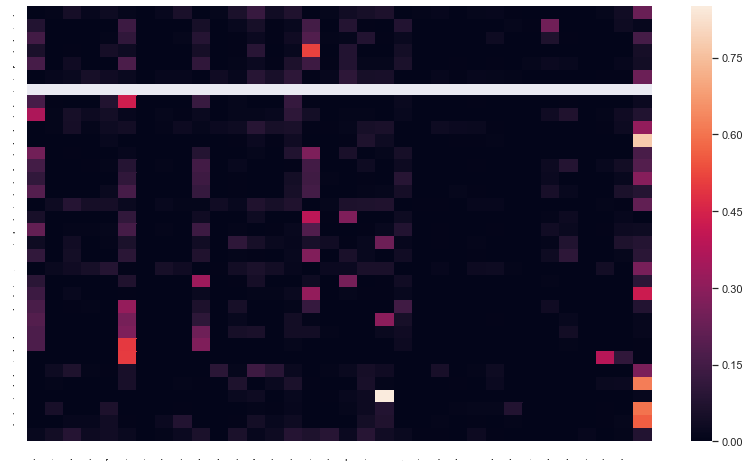

In [197]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [237]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    #proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    for a in RUSSIAN:
        proba = prior * probabilities[start, POS[a]] * probabilities[POS[c], POS[a]] * probabilities[POS[a], end]
        if proba > 0:
            print(''.join(['п', a+c, 'р']), proba)

паар 1.4618370858596316e-08
пгар 2.0240453742647224e-08
пеар 4.079855510152891e-06
пиар 2.560270685890726e-08
пкар 2.9713838323408426e-07
пнар 4.069191073060037e-09
поар 4.300150360722778e-07
ппар 3.1379538234292615e-07
прар 4.013913179019463e-07
псар 1.3570593096547424e-09
птар 2.564780992276715e-07
пуар 4.32404431758913e-08
пфар 3.89083345209816e-09
пчар 2.107527703457522e-10
пшар 9.261546266973488e-11
пэар 1.6758089881039595e-12
пяар 3.964404357661455e-08
п ар 2.41732314840025e-07
пабр 4.725050858284908e-06
пгбр 1.9089833087367933e-09
пебр 4.579242537094617e-05
пибр 6.152466426129066e-07
пкбр 8.223469564504771e-08
пнбр 9.623867225747228e-10
побр 0.00011351194662612818
прбр 8.668887262528476e-07
псбр 1.2089556612485658e-10
птбр 2.0797569300989813e-09
пубр 1.7542194397664282e-06
пчбр 3.4848535596597485e-11
пшбр 2.155854954245966e-12
пыбр 1.4121723235792535e-06
пьбр 7.347360898809185e-10
пэбр 8.13979807573781e-12
пябр 3.2219545180603436e-08
п бр 1.7378106852661877e-08
павр 8.9665693452

# Генерирование выборок из марковской цепи

In [220]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бки ащич 


# Как сгенерировать траекторию скрытой марковской модели?

In [203]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

No handles with labels found to put in legend.


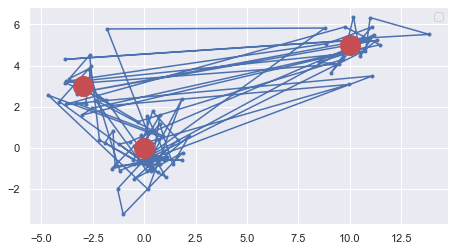

In [204]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

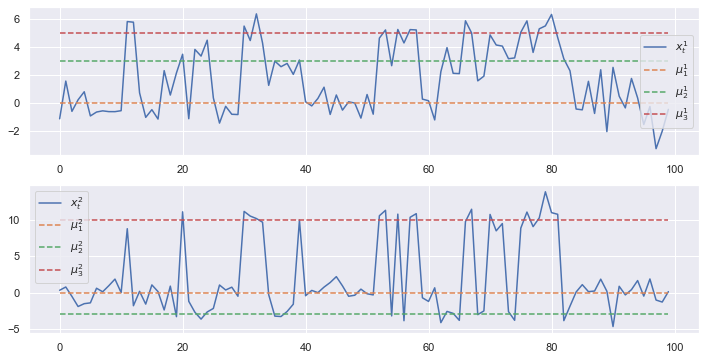

In [205]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

# Прогноз с использованием HMM

In [206]:
from hmmlearn.hmm import GaussianHMM

In [208]:
series = pd.read_csv("../Series/daily-total-female-births-in-cal.csv")["Count"]

In [209]:
values = series.values.reshape(-1,1)

In [210]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932182
2 -1231.414547976922
3 -1228.6376241958321
4 -1222.4806144371282
5 -1214.0854041790628
6 -1208.2775972401896
7 -1200.832430590906
8 -1191.2120452545482
9 -1173.4922234634755
10 -1159.8226949636578
11 -1157.6990214654195
12 -1135.6802958963683
13 -1136.7101399039075


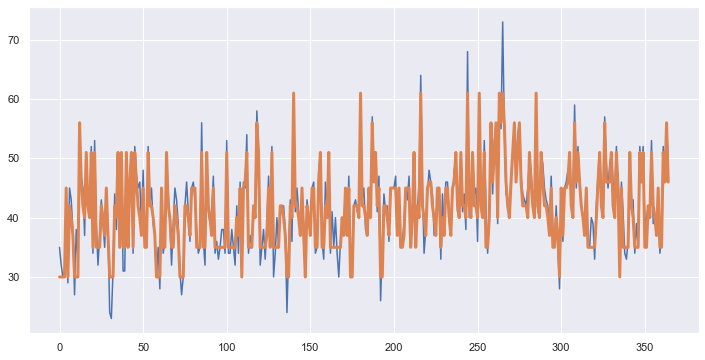

In [211]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [212]:
model.transmat_.shape

(10, 10)